Project-Stock Market Analysis

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load stock market dataset
# Replace 'path_to_your_dataset.csv' with the actual path to your dataset
data = pd.read_csv("C:\\Users\\D.SURESH KUMAR\\Desktop\\archive (1)\\stocks.csv")

# Display the first few rows of the dataset
print(data.head())


  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


In [6]:
# Convert date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as the index
data.set_index('Date', inplace=True)

# Handle missing values
data = data.fillna(method='ffill').dropna()

# Check for duplicates
data = data.drop_duplicates()

# Display data types and summary statistics
print(data.info())
print(data.describe())


C:\Users\D.SURESH KUMAR\AppData\Local\Temp\ipykernel_5976\1278498068.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').dropna()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2023-02-07 to 2023-05-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 15.5+ KB
None
             Open        High         Low       Close   Adj Close  \
count  248.000000  248.000000  248.000000  248.000000  248.000000   
mean   215.252093  217.919662  212.697452  215.381674  215.362697   
std     91.691315   92.863023   90.147881   91.461989   91.454750   
min     89.540001   90.129997   88.860001   89.349998   89.349998   
25%    135.235004  137.440004  134.822495  136.347498  136.347498   
50%    208.764999  212.614998  208.

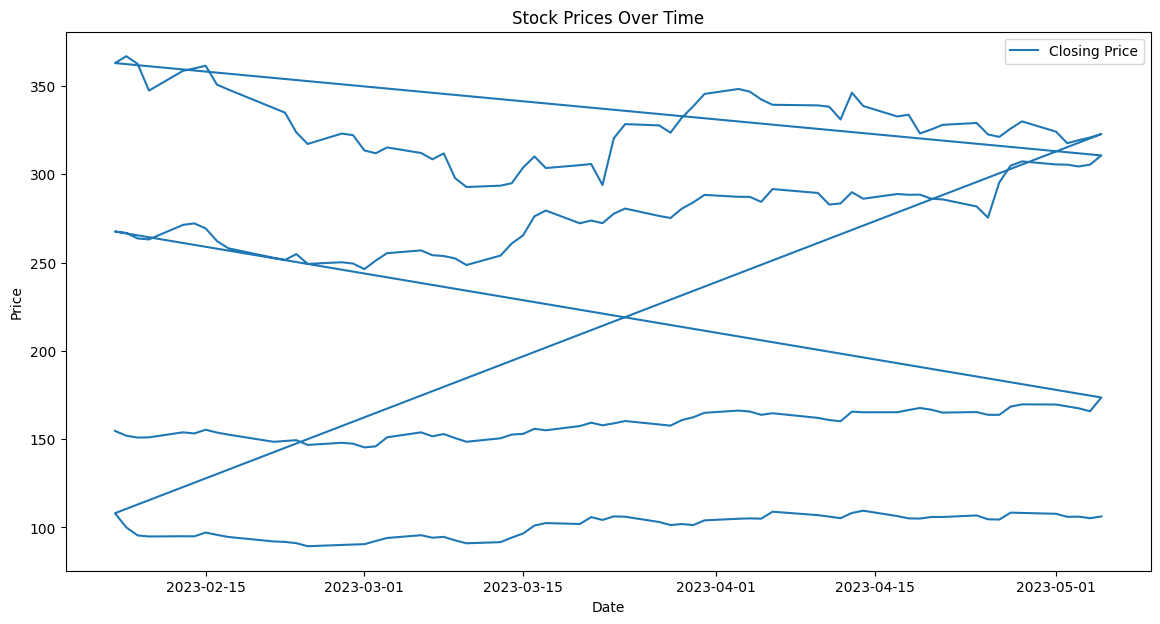

In [7]:
# Plot stock prices over time
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


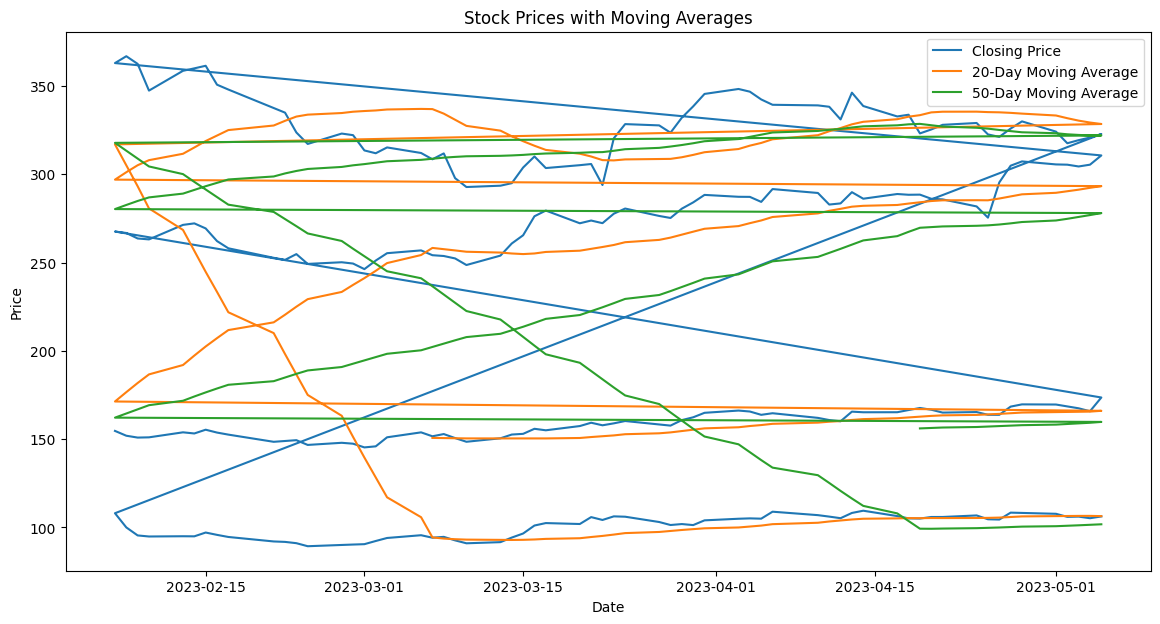

In [8]:
# Calculate moving averages
data['20_MA'] = data['Close'].rolling(window=20).mean()
data['50_MA'] = data['Close'].rolling(window=50).mean()

# Plot moving averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['20_MA'], label='20-Day Moving Average')
plt.plot(data['50_MA'], label='50-Day Moving Average')
plt.title('Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


C:\Users\D.SURESH KUMAR\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\D.SURESH KUMAR\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


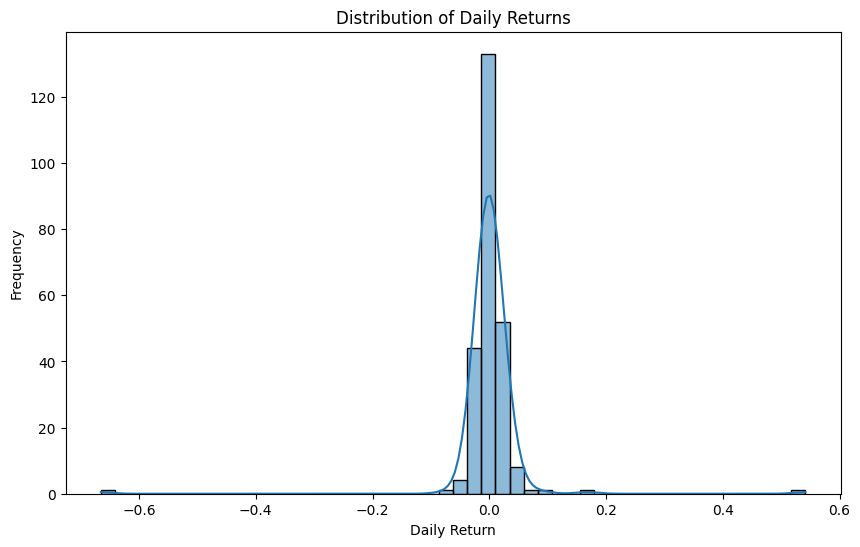

In [9]:
# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Plot distribution of daily returns
plt.figure(figsize=(10, 6))
sns.histplot(data['Daily_Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


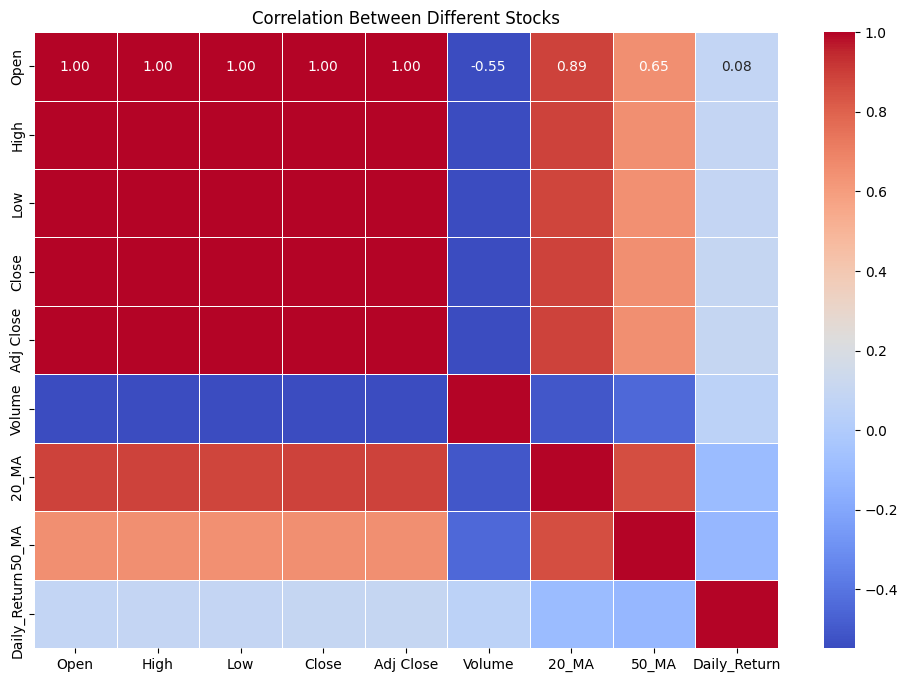

In [11]:
data_numeric = data.select_dtypes(include=[float, int])

# Calculate correlation matrix
correlation_matrix = data_numeric.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Different Stocks')
plt.show()

c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


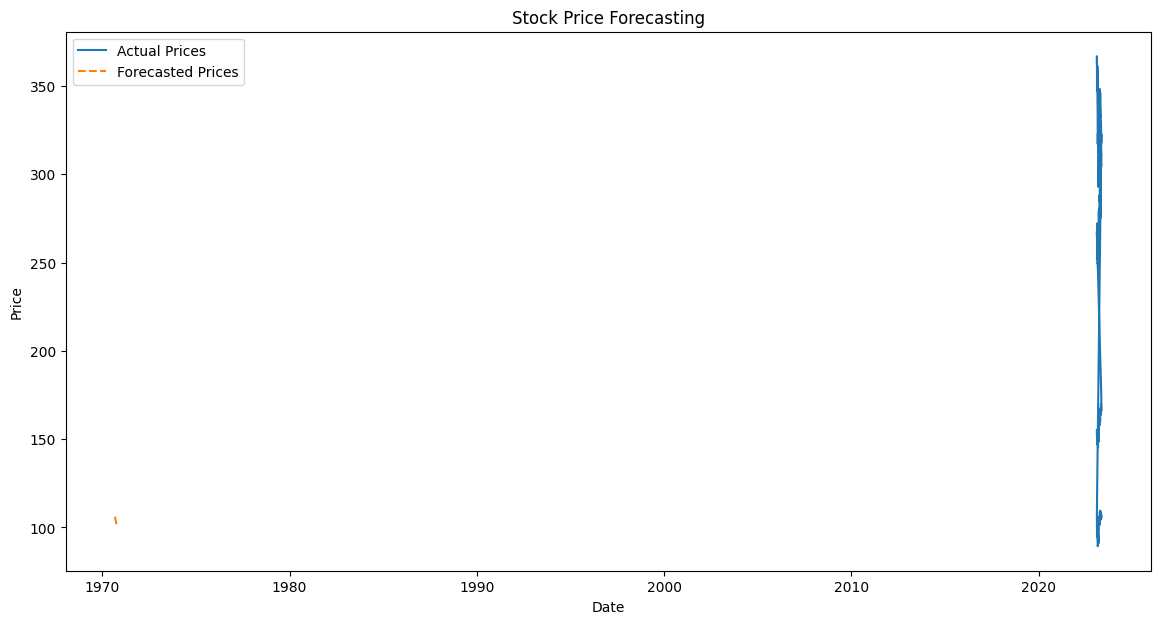

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Use a simple exponential smoothing model for forecasting
model = ExponentialSmoothing(data['Close'], trend='add', seasonal=None, seasonal_periods=None)
fit = model.fit()

# Forecast future stock prices
forecast = fit.forecast(steps=30)

# Plot actual and forecasted stock prices
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Actual Prices')
plt.plot(forecast, label='Forecasted Prices', linestyle='--')
plt.title('Stock Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
